# Sprint-8

### NIVEL 1

Instalo el conector de MySQL a Python

Importar ocultar warnings 

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importar librerias 

In [4]:
import matplotlib.pyplot as plt
import mysql.connector
import squarify as sq
import seaborn as sns
import pandas as pd
import numpy as np

### Hago la conexion con la base de datos del sprint4 de MySQL 

In [5]:
from mysql.connector import Error

try:
    conector = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Password123!',
        database='sprint4'
    )
    print('Conexión correcta')
except Error as err:
    print('Error en la conexión:')

# Despues de un par de intentos, cambiar claves en el MySQL finalmente la conexion es correcta

Conexión correcta


In [6]:
# Hago un bucle for traer las tablas y meterlas en un diccionario

tablas = ['user', 'transaction', 'credit_card', 'companies','product'] #Traigo product pero no la tengo conectada en mysql 
dfs = {}  # Diccionario para guardar los dataframes

for tabla in tablas:
    dfs[f"df_{tabla}"] = pd.read_sql(f"SELECT * FROM {tabla}", con=conector)



In [7]:
#Como en MySQL no hice el nivel 3 del sprint 4 no llegué a conectar la tabla product con una tabla intermedia 

df_tx = dfs['df_transaction'][['id', 'product_id']].copy() #hago una copia de id y product id y lo meto en una variable

df_tx['product_id'] = df_tx['product_id'].str.split(",") # Utilizo split para pasar los Ids que estaban separados por "," a listas

df_tx['product_id'] = df_tx['product_id'].apply(lambda x: [i.strip() for i in x]) #limpio el ID por si tiene espacio con strip 

df_intermedia = df_tx.explode('product_id') # Genero la tabla intermedia con la copia limpia y la "exploto" para que se separe en filas 

dfs['tabla_intermedia'] = df_intermedia # la guardo en mi diccionario dfs para tener toda la informacion ordenada

In [8]:
dfs.keys() #reviso las tablas 

dict_keys(['df_user', 'df_transaction', 'df_credit_card', 'df_companies', 'df_product', 'tabla_intermedia'])

### Limpiar Datos 

In [9]:
# la tabla product tiene el símbolo $
dfs['df_product']['price'] = dfs['df_product']['price'].str.replace('$', '')
dfs['df_product']['price'] = dfs['df_product']['price'].astype(float)

In [10]:
# la tabla transacciones tiene timestamp y agrego una columna separada para poder hacer los gráficos por mes, por año y por día

dfs['df_transaction']['timestamp'] = pd.to_datetime(dfs['df_transaction']['timestamp'])  # Primero la paso a datetime

dfs['df_transaction']['date'] = dfs['df_transaction']['timestamp'].dt.strftime('%d/%m/%Y')  # creo la nueva columna con formato fecha

# Hago más columnas de año, mes y día
dfs['df_transaction']['year'] = dfs['df_transaction']['timestamp'].dt.year

dfs['df_transaction']['month'] = dfs['df_transaction']['timestamp'].dt.month

dfs['df_transaction']['day'] = dfs['df_transaction']['timestamp'].dt.day

# La columna declined está en formato str, la cambio a int
dfs['df_transaction']['declined'] = dfs['df_transaction']['declined'].astype(int)

# Me aseguro que amount esté en float y no en str
dfs['df_transaction']['amount'] = dfs['df_transaction']['amount'].astype(float)

# Lat y Longitude están en formato str, lo paso a int
dfs['df_transaction']['lat'] = dfs['df_transaction']['lat'].astype(float)
dfs['df_transaction']['longitude'] = dfs['df_transaction']['longitude'].astype(float)

In [11]:
# La tabla Credit Card tiene expiring date como str lo cambio a datetime 

dfs['df_credit_card']['expiring_date'] = pd.to_datetime(dfs['df_credit_card']['expiring_date'], errors='coerce')


In [12]:
# Finalmente así queda el data frame de transacions 

dfs['df_transaction']

,id,card_id,business_id,timestamp,amount,declined,product_id,user_id,lat,longitude,date,year,month,day
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.918459,-12.527556,28/08/2021,2021,8,28
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.969489,-117.525184,26/07/2021,2021,7,26
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222681,-129.049880,06/01/2022,2022,1,6
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.359306,-100.555928,26/01/2022,2022,1,26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.738145,158.298210,26/10/2021,2021,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.319472,-11.413491,13/03/2022,2022,3,13
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168,-64.671544,16/03/2022,2022,3,16
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.860453,-172.345729,13/06/2021,2021,6,13
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.075143,-142.241696,09/11/2021,2021,11,9


In [13]:
# Paleta de colores por si la necesito a futuro 

colores_marrones = ['peru','burlywood','sandybrown','tan','chocolate','sienna','rosybrown','wheat','linen','antiquewhite','beige','brown','maroon','darkgoldenrod']


### Ejercicio 1
Una variable Numerica.

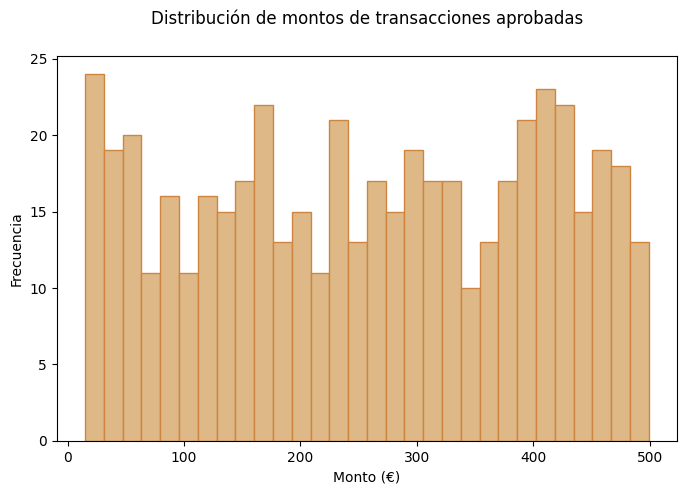

In [14]:
# Filtrar solo las transacciones aprobadas
transacciones_aprobadas = dfs['df_transaction'][dfs['df_transaction']['declined'] == 0]

plt.figure(figsize=(8, 5))
transacciones_aprobadas['amount'].hist(bins=30, color='burlywood', edgecolor='peru')
plt.title('Distribución de montos de transacciones aprobadas',y=1.06)
plt.xlabel('Monto (€)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

Conclusión del ejercicio 1:

La distribución de los montos de transacciones aprobadas muestra dos grupos destacados:

- Uno en montos bajos (menores a $100)  
- Otro en el rango alto, entre $400 y $500

Esto sugiere que las transacciones tienden a concentrarse tanto en compras pequeñas como en montos más elevados,  
mientras que los valores intermedios (entre $100 y $300) tienen una frecuencia menor y más dispersa.

### Ejercicio 2 
Dos variables numericas.

Me planteo en hacer un grafico entre el peso de los productos y el amount de la transaction, a mayor peso mas altas son las transacciones? 

In [15]:
# Hago merge entre tabla intermedia product y tabla intermedia transacions para que las tres esten conectadas 
df_merge1 = dfs['tabla_intermedia'].merge(dfs['df_product'],left_on='product_id',right_on='id',how='left')
df_tx_product = df_merge1.merge(dfs['df_transaction'], left_on='id_x', right_on='id', how='left')

# Compruebo cambio Weight a float 
df_tx_product['weight'] = df_tx_product['weight'].astype(float)

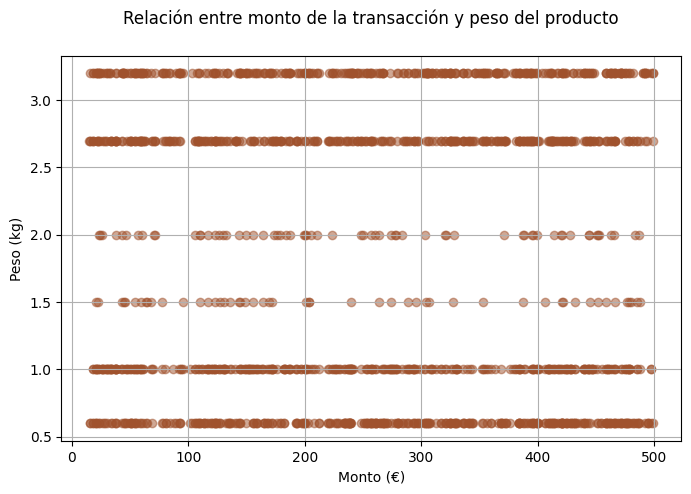

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(df_tx_product['amount'], df_tx_product['weight'], alpha=0.5, color='sienna')
plt.title('Relación entre monto de la transacción y peso del producto', y=1.06)
plt.xlabel('Monto (€)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()


Conclusión del ejercicio 2:


La visualización muestra que los pesos de los productos están agrupados en valores específicos y repetitivos,

lo que genera líneas horizontales en el gráfico. No se observa una tendencia clara entre el peso del producto y el monto total de la transacción,

lo que sugiere que el peso no influye directamente en el valor final de la compra.

Esto podría indicar que otros factores (como el tipo o precio del producto) tienen mayor impacto en el monto total que su peso.

In [ ]:
correlacion = df_tx_product['amount'].corr(df_tx_product['weight'])
print(f'Correlación entre monto y peso: {correlacion:.2f}')

"""En este caso el resultado de -0.01 al estar cerca del 0 significa
que realmente no afecta el peso del producto con el monto final de la transaccion."""


Correlación entre monto y peso: -0.01


'En este caso el resultado de -0.01 al estar cerca del 0 significa\nque realmente no afecta el peso del producto con el monto final de la transaccion.'

### Corrección ejercicio 

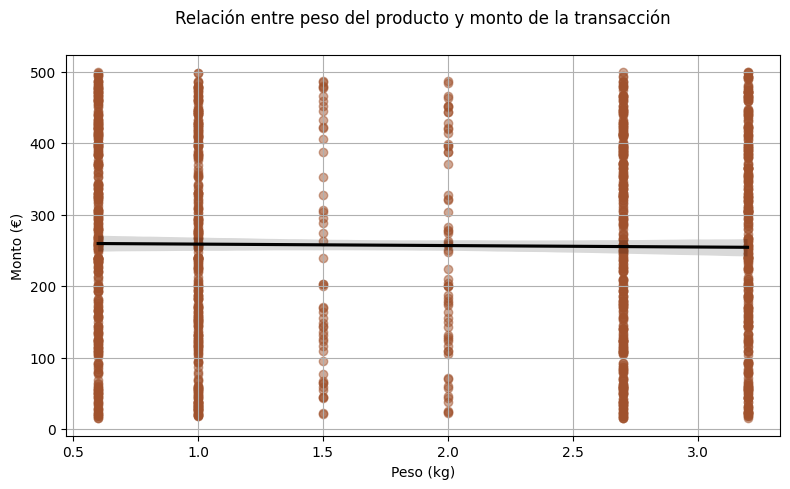

In [34]:
# Ejercicio anterior post correccion con Joan
""""en el scatter mejor la variable que explica en el eje X, (el peso explica el monto, y no al revés, no?).
Prueba a añadir también la recta de regresión, así se vuelve más interesante cuando hay tantos puntos"""


# Scatter + recta de regresión
plt.figure(figsize=(8, 5))
sns.regplot(data=df_tx_product, x='weight', y='amount', scatter_kws={'alpha':0.5, 'color': 'sienna'}, line_kws={'color': 'black'})

# Etiquetas y estética
plt.title('Relación entre peso del producto y monto de la transacción', y=1.06)
plt.xlabel('Peso (kg)')
plt.ylabel('Monto (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

Conlusion ejercicio 2 post corrección: 

El gráfico muestra que el peso del producto no tiene una relación clara con el monto total de la transacción. La recta de regresión plana indica que el peso no predice significativamente el monto. Además, la concentración de puntos sugiere que el peso toma valores discretos y no continuos, lo cual limita su valor como variable explicativa en este contexto.

## Ejercicio 3
Una variable categórica.

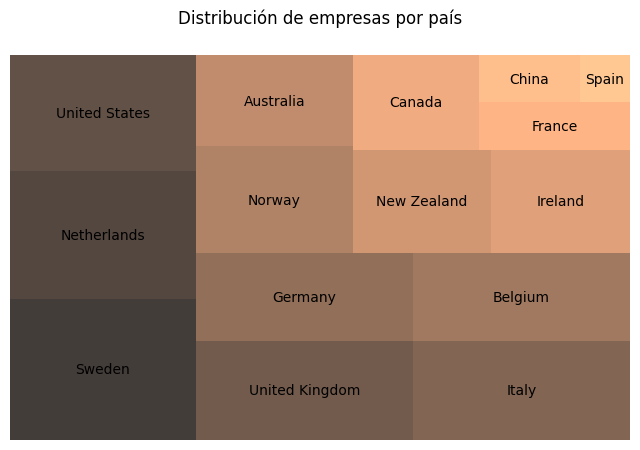

In [19]:

data = dfs['df_companies']['country'].value_counts()

# Treemap
plt.figure(figsize=(8, 5))
sq.plot(sizes=data.values, label=data.index, color=sns.color_palette('copper',15), alpha=.8)
plt.title('Distribución de empresas por país', y=1.06)
plt.axis('off')
plt.show()

Conclusiones ejercicio 3:

El treemap muestra la distribución de las empresas por país, permitiendo visualizar de forma clara las proporciones entre cada categoría. Se observa que algunos países, como Suecia, concentran la mayor cantidad de empresas, mientras que otros, como España, China y Francia, tienen una menor participación.


### Ejercicio 4 
Una variable categórica y una numérica.

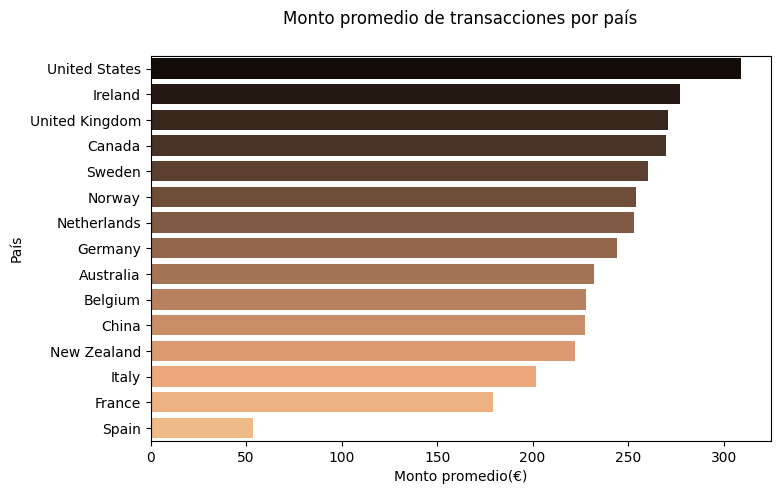

In [20]:
# Monto promedio de transaccion por pais 

# Primero hago un merge entre transaction y companies 
df_tx_country = dfs['df_transaction'].merge(dfs['df_companies'], left_on='business_id', right_on ='company_id',how='left')

plt.figure(figsize=(8,5))
sns.barplot(data=df_tx_country,
            x='amount',
            y='country',
            estimator='mean',
            ci=None,
            palette = 'copper',
            order=df_tx_country.groupby('country')['amount'].mean().sort_values(ascending=False).index)
plt.title('Monto promedio de transacciones por país',y=1.06)
plt.xlabel('Monto promedio(€)')
plt.ylabel('País')
plt.grid(False)
plt.show()

Conclusiones ejercicio 4:

El gráfico de barras muestra el monto promedio de transacciones por país. Se puede observar que Estados Unidos lidera con el monto promedio más alto, superando los 300€, mientras que España presenta el monto promedio más bajo, por debajo de 100€.

### Ejercicio 5

Dos variables categóricas

In [21]:
# Primero quería sacar la edad de los usuarios, en Power Bi lo hice con DAX
from datetime import datetime

# Para este ejercicio separo en una variable df_user

df_user=dfs['df_user']

df_user['birth_date']=pd.to_datetime(df_user['birth_date'], errors='coerce')
df_user['edad'] =df_user['birth_date'].apply(lambda x:datetime.now().year -x.year)

In [22]:
# Ahora que tengo las edades hago una funcion para clasificarlos por rango de edad 
def tipo_edad(rango_edad):
    if pd.isna(rango_edad):
        return 'Desconocido'
    elif rango_edad < 30:
        return 'Joven'
    elif rango_edad < 60:
        return 'Adulto'
    else:
        return 'Senior'

In [23]:
df_user['clasificación_edad'] = df_user['edad'].apply(tipo_edad)

In [24]:
# Ahora hago un conteo de clasificacion de edad y country 

conteo = df_user.groupby(['country', 'clasificación_edad']).size().reset_index(name='cantidad')

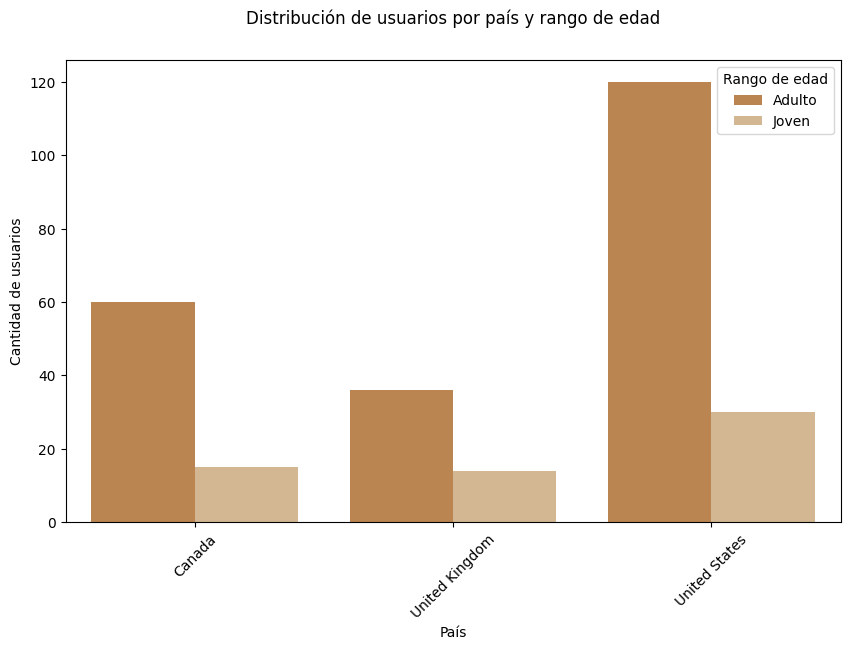

In [25]:

plt.figure(figsize=(10,6))
sns.barplot(
    data=conteo,
    x='country',
    y='cantidad',
    hue='clasificación_edad',
    palette= colores_marrones
)

plt.title('Distribución de usuarios por país y rango de edad',y=1.06)
plt.xlabel('País')
plt.ylabel('Cantidad de usuarios')
plt.legend(title='Rango de edad')
plt.xticks(rotation=45)
plt.show()

Conclusiones ejercicio 5: 

Se observa que el segmento adulto predomina en los tres países analizados. Esto sugiere que los productos y estrategias de marketing deberían adaptarse a los intereses de este grupo etario. Considerando la temática de ficción que tiene la tabla productos, se podrían priorizar coleccionables, series o películas clásicas que marcaron la adolescencia de este grupo etario. 

### Ejercicio 6

Tres variables 

In [26]:
# La idea sería visualizar que rango de edad compra los productos mas caros y de que país son
# El merge de transactions con product lo tengo de ejercicios anteriores falta el de user con transaction
# Agrego suffixes porque tengo nombres de id repetidos 
# Tambien tengo que unir con product (primero con la tabla intermedia) porque no quiero ver el amount total que compro el user quiero ver si compran los productos mas caros 
# Al hacer el merge entre todas las tablas quedan nulos en algunas filas porque no todos los usuarios han comprado productos 
df_tx_user = dfs['df_transaction'].merge(dfs['df_user'],left_on='user_id',right_on='id',how='left',suffixes=('', '_user'))
df_tx_user_product = df_tx_user.merge(dfs['tabla_intermedia'],left_on='id',right_on='id',how='left',suffixes=('', '_intermedia'))
df_total_ejercicio_6 = df_tx_user_product.merge(dfs['df_product'],left_on='product_id',right_on='id',how='left',suffixes=('', '_product'))
#el resultado de hacer merge a las 4 tablas es que genera algunos nulos porque no todos los usuarios han comprado algunos solo estan registrados 
df_filtrado = df_total_ejercicio_6.dropna(subset=['price'])

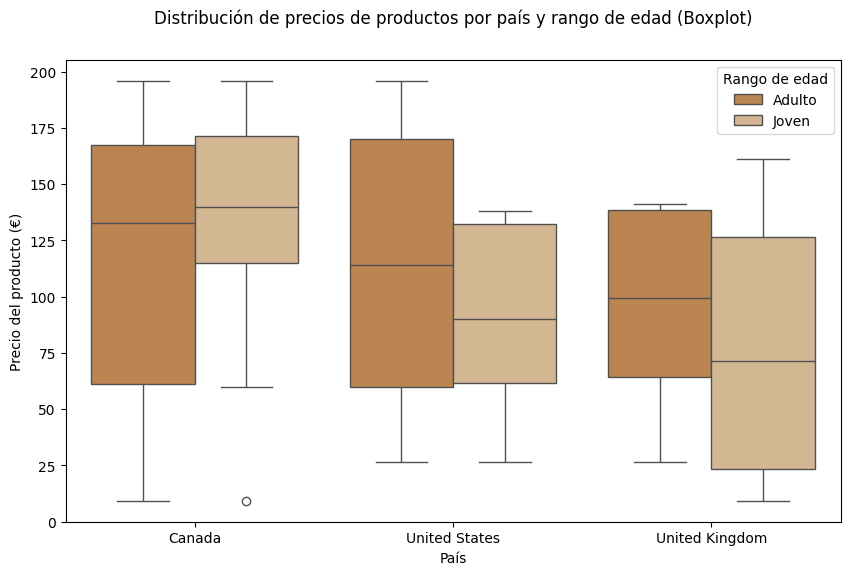

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtrado,
    x='country',
    y='price',
    hue='clasificación_edad',
    palette=colores_marrones
)
plt.title('Distribución de precios de productos por país y rango de edad (Boxplot)',y=1.06)
plt.xlabel('País')
plt.ylabel('Precio del producto (€)')
plt.legend(title='Rango de edad')
plt.xticks(rotation=0)
plt.show()

Conclusiones ejercicio 6:

Jóvenes en Canadá parecen ser el grupo que gasta más en productos, posiblemente por preferencias en ciertos artículos más premium o de moda.

Adultos en Estados Unidos gastan más que los jóvenes, lo que puede reflejar un mayor poder adquisitivo o preferencias por productos de mayor valor.



### Ejercicio 7

Graficar un Pairplot

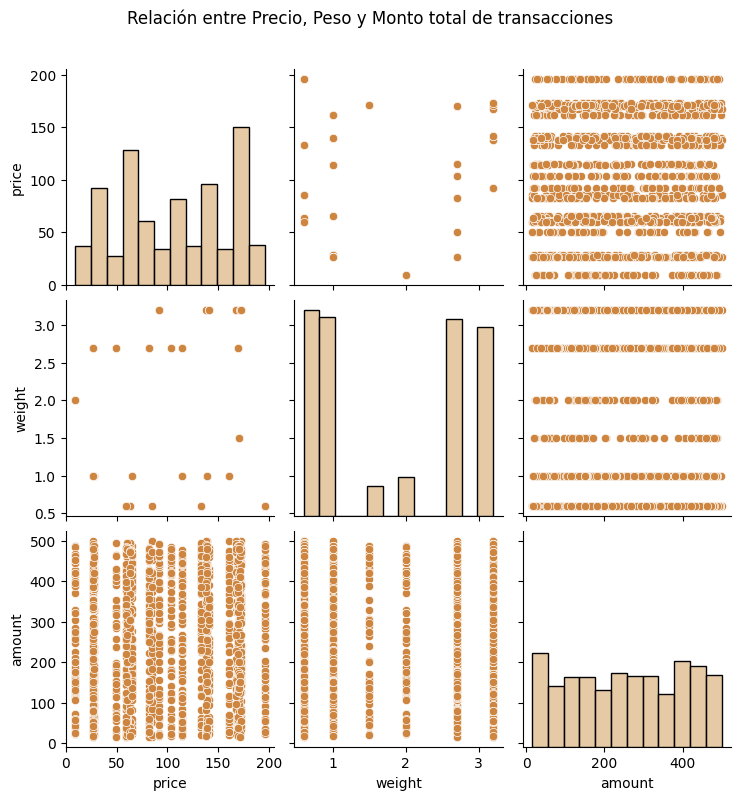

In [28]:
# Elijo las variables numericas que quiero usar y elimino los Nan
df_pairplot = df_tx_product[['price', 'weight', 'amount']].dropna()

sns.pairplot(
    data=df_pairplot,
    vars=['price', 'weight', 'amount'],
    plot_kws={'color': 'peru'}, 
    diag_kws={'color': 'burlywood'})
plt.suptitle('Relación entre Precio, Peso y Monto total de transacciones', y=1.06)
plt.show()


Conclusiones Ejercicio 7: 

No parece haber una correlacion clara entre precio y peso, los puntos estan dispersos productos caros y baratos pueden tener cualquier peso. 

Entre peso y monto total no hay una relacion visible 

En las distribuciones individuales:
- Precio hay productos concentrados entre 50 y 150 euros.
- Peso se que hay 3 pesos fijos 1, 2 y 3 kilos 
- Monto total es bastante las barras indican una concentracion de montos bajos hasta que llega a 400 que se mantiene


### NIVEL 2

### Ejercicio 1

Correlación de todas las variables numéricas.

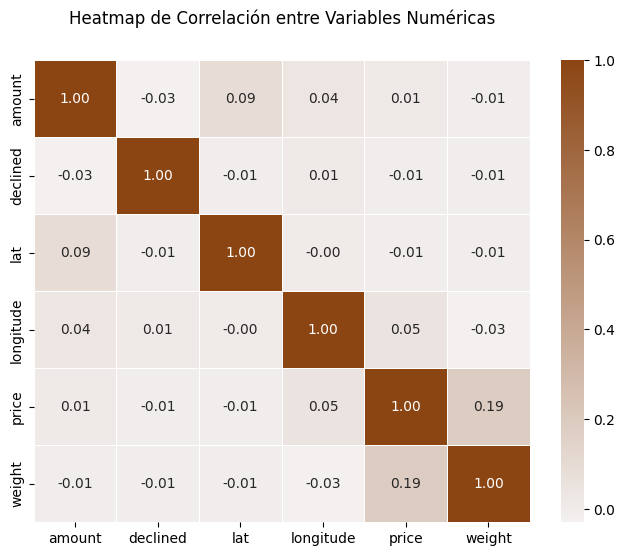

In [29]:
# Selecciono columnas numéricas
df_corr = df_tx_product[['amount', 'declined', 'lat', 'longitude', 'price', 'weight']]

# Elimino NaN
df_corr = df_corr.dropna()

# Calculo la matriz de correlación
correlacion = df_corr.corr().round(2)

# Heatmap
plt.figure(figsize=(8,6))
cmap_marron = sns.light_palette('saddlebrown', as_cmap=True) # Sigo con los marrones.
sns.heatmap(correlacion, annot=True, cmap=cmap_marron, fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlación entre Variables Numéricas',y=1.06)
plt.show()

Concluisión ejercicio 1: 

- No hay relaciones fuertes entre las variables numéricas de este dataset.

- Las variables están bastante independientes entre sí.

- price y weight es la única pareja con algo de relación, pero es muy débil (0.19).

### Ejercicio 2

Implementa un jointplot.

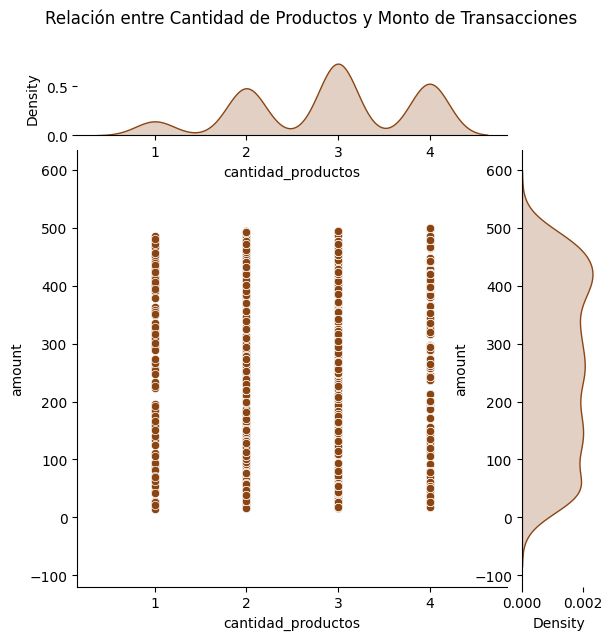

In [30]:
# Primero quise revisar amount con cantidad de productos  

cantidad_productos = df_tx_product.groupby('id_x')['product_id_x'].count().reset_index() # Tuve que generar un count de los productos 
cantidad_productos.rename(columns={'product_id_x': 'cantidad_productos'}, inplace=True) # hacerle su propia columna 

# Lo segundo era unir esto con el merge anterior

df_joint_extendido = df_tx_product.merge(cantidad_productos, on='id_x', how='left') 

# Ahora sí el Jointplot
g = sns.jointplot(data=df_joint_extendido,x='cantidad_productos', y='amount', kind='scatter', color='saddlebrown')

# Reemplazo manual los marginales por KDE esto lo hago porq me da barras por defecto y yo quiero mostrarlo en KDE 
g.ax_marg_x.clear()
g.ax_marg_y.clear()

sns.kdeplot(data=df_joint_extendido, x='cantidad_productos', ax=g.ax_marg_x, fill=True, color='saddlebrown')

sns.kdeplot(data=df_joint_extendido, y='amount', ax=g.ax_marg_y, fill=True, color='saddlebrown')

plt.suptitle('Relación entre Cantidad de Productos y Monto de Transacciones', y=1.06)
plt.show()


Conclusiones Ejercicio 2:

- El pico mayor está en 3 productos, o sea, la mayoría de transacciones tienen 3 productos. También hay bastantes con 4 y algunas con 1 o 2.

- 3 productos por transacción es lo más común.

- Los montos altos (300-450 €) son frecuentes, sin importar mucho la cantidad de productos.

### NIVEL 3

### Ejercicio 1 

Implementa un violinplot combinado con otro tipo de gráfico.

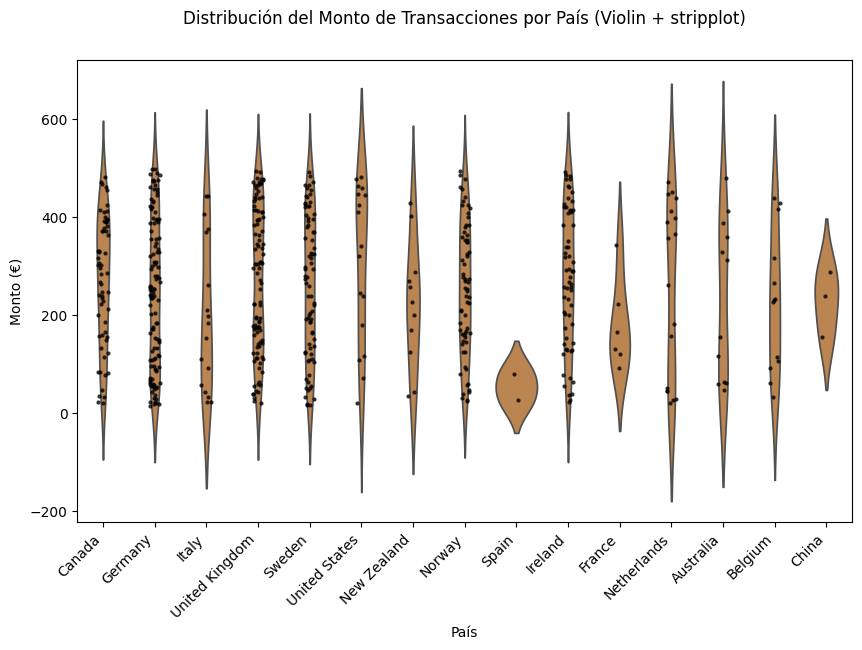

In [31]:
df_tx_company = dfs['df_transaction'].merge(dfs['df_companies'], left_on='business_id',right_on='company_id',how='left')

plt.figure(figsize=(10,6))

# Violinplot
sns.violinplot(data=df_tx_company,x='country',y='amount',inner=None,color='peru')

# stripplot
sns.stripplot(data=df_tx_company,x='country',y='amount',color='black',size=3,jitter=True,alpha=0.8)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribución del Monto de Transacciones por País (Violin + stripplot)',y=1.06)
plt.ylabel('Monto (€)')
plt.xlabel('País')
plt.show()

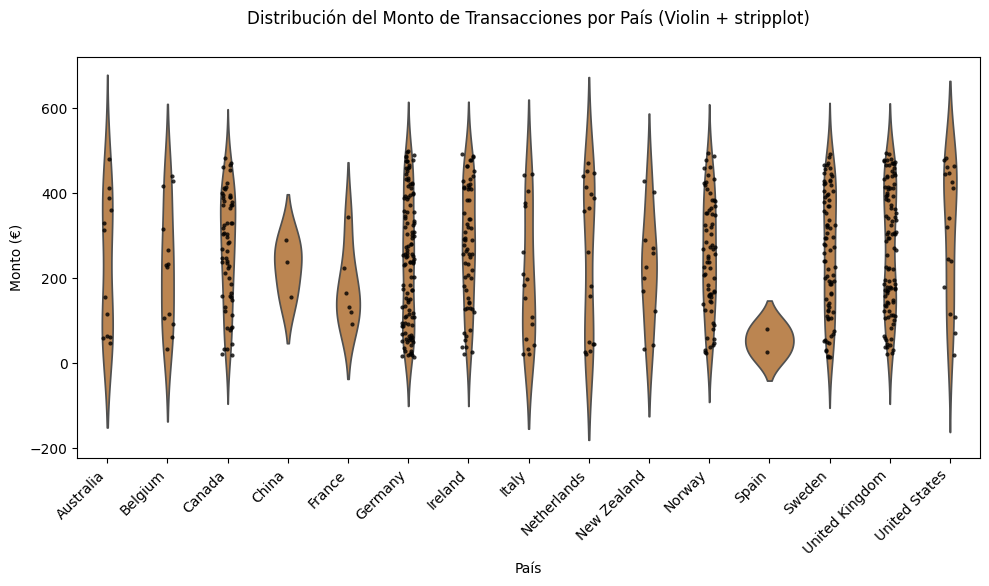

In [32]:
df_tx_company = dfs['df_transaction'].merge(dfs['df_companies'], left_on='business_id',right_on='company_id',how='left')

plt.figure(figsize=(10, 6))

orden_alfabetico = sorted(df_tx_company['country'].dropna().unique())
sns.violinplot(data=df_tx_company, x='country',y='amount',inner=None,color='peru',order=orden_alfabetico)

# Stripplot
sns.stripplot(data=df_tx_company,x='country',y='amount',color='black',size=3,jitter=True,alpha=0.8,order=orden_alfabetico)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribución del Monto de Transacciones por País (Violin + stripplot)', y=1.06)
plt.ylabel('Monto (€)')
plt.xlabel('País')
plt.tight_layout()
plt.show()

Conclusiones ejercicio 1: 

- Italy, United Kingdom y Sweden presentan distribuciones similares, con montos que se mueven entre 50€ y 500€ aproximadamente.
- Algunos países tienen puntos dispersos en zonas alejadas serían los outliers del gráfico como  Australia, Estados Unidos y Países Bajos,
    
    indicando transacciones con montos muy distintos al promedio.


### Ejercicio 2 

Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

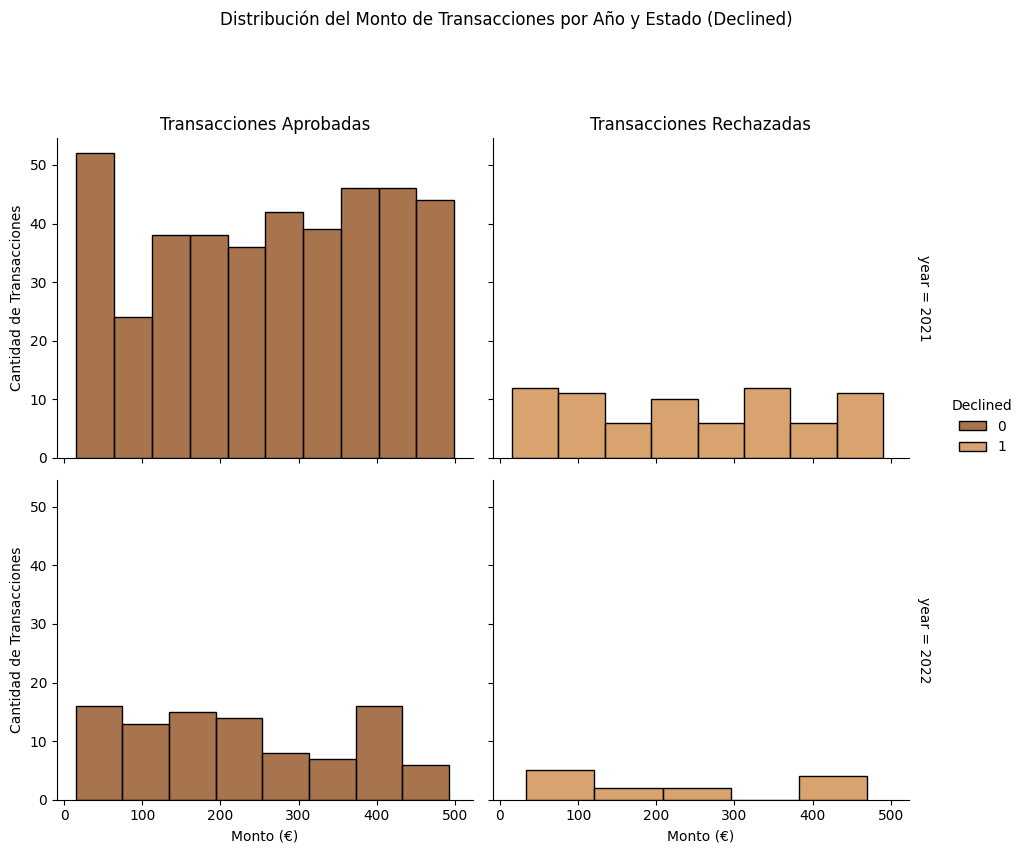

In [33]:
df_transaction = dfs['df_transaction']

# Crear el FacetGrid
g = sns.FacetGrid(df_transaction, row='year', col='declined', margin_titles=True,height=4,aspect=1.2,hue='declined',palette={0: 'saddlebrown', 1: 'peru'})


# Mapeo del histograma
g.map_dataframe(sns.histplot, x='amount')

# Etiquetas de ejes
g.set_axis_labels("Monto (€)", "Cantidad de Transacciones")

# Título general
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución del Monto de Transacciones por Año y Estado (Declined)", y=1.06)

# Leyenda
g.add_legend(title='Declined')

# Reemplazo de títulos en las columnas (declined)
reemplazos = {0: 'Transacciones Aprobadas', 1: 'Transacciones Rechazadas'}
for ax, col_val in zip(g.axes[0], g.col_names):
    ax.set_title(reemplazos.get(col_val, col_val))

plt.show()

Conclusion ejercicio 2: 

La mayoría de las transacciones son aprobadas, y estas tienden a concentrarse en montos bajos a medios (100-400 €).
